Regression Equation: BMEP = 9.460 + (0.018 * Injection_timing) + (0.014 * Injector_pressure) + (0.284 * Temperature) + (-0.005 * EGT) + (-0.181 * VE) + (0.911 * CL)
R-squared: 0.9392346695130439
MSE: 0.008507146268173851


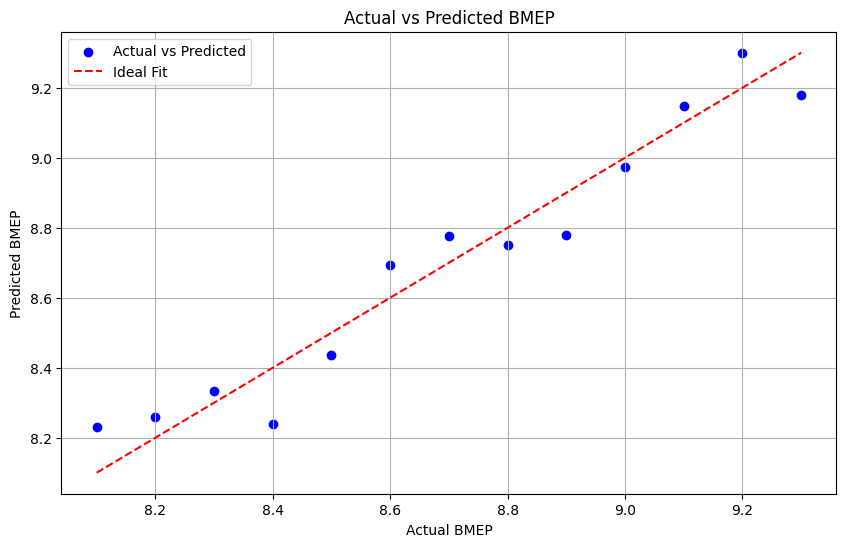

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Input data
data = {
    "Injection_timing": [27, 27, 27, 27, 27, 27, 27, 30, 30, 30, 30, 30, 30],
    "Injector_pressure": [190, 230, 270, 190, 190, 230, 270, 190, 190, 230, 230, 270, 270],
    "Temperature": [29, 30, 30.5, 29.5, 30, 30.5, 31, 31.5, 32, 32, 32.5, 32.5, 33],
    "EGT": [460, 450, 440, 400, 375, 350, 325, 340, 320, 320, 300, 300, 280],
    "VE": [78, 80, 82, 75.5, 76.5, 77.5, 78.5, 79, 79.5, 79.5, 80, 80, 81],
    "CL": [4.5, 4.3, 4.1, 3.4, 3.2, 3, 2.8, 3, 2.8, 2.8, 2.6, 2.6, 2.4],
    "BMEP": [8.5, 8.7, 9, 8.3, 8.4, 8.6, 9.1, 8.2, 8.1, 8.9, 8.8, 9.2, 9.3]
}

df = pd.DataFrame(data)

# Define features and target
X = df[["Injection_timing", "Injector_pressure", "Temperature", "EGT", "VE", "CL"]]
y = df["BMEP"]

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Predict BMEP
y_pred = model.predict(X)

# Calculate R-squared and MSE
r_squared = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Print the regression equation
intercept = model.intercept_
coefficients = model.coef_
equation = f"BMEP = {intercept:.3f}"
for i, col in enumerate(X.columns):
    equation += f" + ({coefficients[i]:.3f} * {col})"
print("Regression Equation:", equation)

# Print R-squared and MSE values
print("R-squared:", r_squared)
print("MSE:", mse)

# Plot the regression results
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel("Actual BMEP")
plt.ylabel("Predicted BMEP")
plt.title("Actual vs Predicted BMEP")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import pickle
filename = 'bmep_model.sav'
pickle.dump(model, open(filename, 'wb'))